## Observations and Insights 

- Capomulin and Ramicane are very similar and appear to be superior treatments to that of Infubinol and Ceftamin. 
- Weight appears to have a significant impact on efficacy. The more a subject weights the less effective the treatment.
- Drug effectiveness does not appear to be impacted by gender.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"]


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = merged_df.set_index("Mouse ID").drop(index="g989")
cleaned_data_df = cleaned_data_df.reset_index()


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_data_df = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

tumor_mean = tumor_data_df.mean()
tumor_median = tumor_data_df.median()
tumor_variance = tumor_data_df.var()
tumor_stddev = tumor_data_df.std()
tumor_sem = tumor_data_df.sem()

# Create a dataframe for storing the summary stats
summary_stats = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_variance,
    "Std Dev": tumor_stddev,
    "SEM": tumor_sem
})
summary_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_stats_df = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
tumor_vol_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

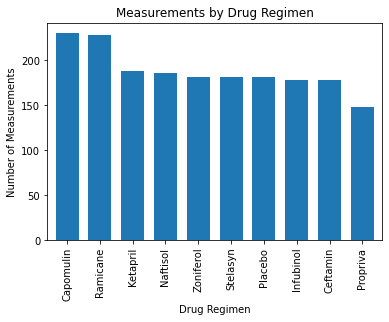

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

title = "Measurements by Drug Regimen"
xlabel = "Drug Regimen"
ylabel = "Number of Measurements"

bar_plot = cleaned_data_df["Drug Regimen"].value_counts().plot(kind="bar", width=0.7, title=title, xlabel=xlabel, ylabel=ylabel)

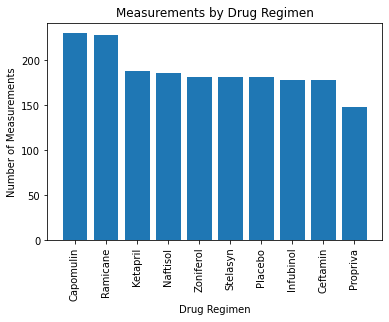

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_by_drug = cleaned_data_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(measurements_by_drug))
tick_loc = [value for value in x_axis]
plt.bar(x_axis, measurements_by_drug)
plt.xticks(tick_loc, measurements_by_drug.index, rotation="vertical")

# Set axis labels and chart title
plt.title("Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

# Display chart
plt.show()


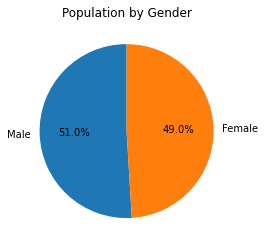

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_by_gender = cleaned_data_df["Sex"].value_counts()
mice_by_gender.plot(kind="pie", ylabel="", startangle=90, autopct="%1.1f%%", title="Population by Gender");


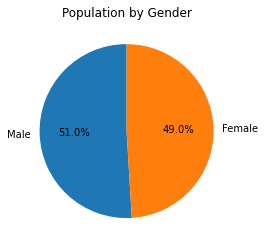

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_by_gender = cleaned_data_df["Sex"].value_counts()
plt.pie(mice_by_gender, labels=mice_by_gender.index, autopct="%1.1f%%", startangle=90)
plt.title("Population by Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = cleaned_data_df.groupby("Mouse ID")["Timepoint"].max()
max_tp_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
compiled_max_tp_df = pd.merge(cleaned_data_df, max_tp_df, how="inner", on=["Mouse ID","Timepoint"])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vols = []

# Dataframe for holding the outlier quantitative data indexed by drug regimen
outliers_df = pd.DataFrame(data=None,index=drugs, columns=["IQR","Lower Bound","Upper Bound","Outliers"])

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_df = compiled_max_tp_df.loc[compiled_max_tp_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tumor_vols.append(tumor_vol_df)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lbound = lowerq - (1.5*iqr)
    ubound = upperq + (1.5*iqr)

    outliers = tumor_vol_df.loc[(tumor_vol_df < lbound) | (tumor_vol_df > ubound)]

    outliers_df.at[drug,"IQR"] = iqr
    outliers_df.at[drug,"Lower Bound"] = lbound
    outliers_df.at[drug,"Upper Bound"] = ubound
    outliers_df.at[drug,"Outliers"] = outliers.count()

# Display the outliers quantitative data
outliers_df

,IQR,Lower Bound,Upper Bound,Outliers
Capomulin,7.78186,20.7046,51.832,0
Ramicane,9.09854,17.9127,54.3068,0
Infubinol,11.4771,36.8329,82.7414,1
Ceftamin,15.5778,25.3554,87.6665,0


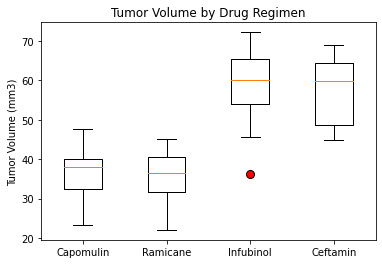

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
props = {
    "marker": "o",
    "markerfacecolor": "r",
    "markersize": 8,
    'markeredgecolor': "black"
}

plt.boxplot(final_tumor_vols, flierprops=props)
plt.title("Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(1, len(drugs)+1), drugs)
plt.show()

## Line and Scatter Plots

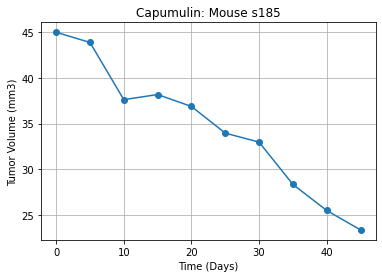

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data_df = cleaned_data_df.loc[cleaned_data_df["Mouse ID"] == "s185"]
plt.plot(mouse_data_df["Timepoint"], mouse_data_df["Tumor Volume (mm3)"], marker="o")

# Add axis labels, chart title, and grid
plt.title("Capumulin: Mouse s185")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Display chart
plt.show()


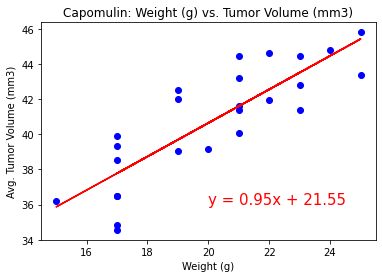

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_by_id_df = capomulin_df.groupby("Mouse ID").mean()

x_axis = capomulin_by_id_df["Weight (g)"]
y_axis = capomulin_by_id_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = (x_axis * slope) + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.annotate(line_eq, (20, 36), fontsize=15, color="red")
plt.scatter(x_axis, y_axis, color="b", alpha=1)
plt.plot(x_axis,regress_values, "r-")

plt.title("Capomulin: Weight (g) vs. Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis, y_axis)
print(f"Correlation coefficient between weight (g) and avg. Tumor Volume (mm3) for 'Capomulin' regimen is {round(correlation[0],2)}.")

Correlation coefficient between weight (g) and avg. Tumor Volume (mm3) for 'Capomulin' regimen is 0.84.
